In [1]:
# Load libraries
import numpy
import seaborn
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

c:\Users\ashen\anaconda3\envs\detection\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load dataset
dataset = pandas.read_csv("./optical_injection_locking.csv")

In [3]:
print(dataset.head(5))

    id  injection_ratio  detuning_frequency  emitted_light_beam_intensity  \
0  369        -45.00328             0.02039                        578.16   
1   56        -44.91711            -0.16249                        578.95   
2  363        -44.88838             0.47361                        578.45   
3   63        -44.85487             0.16749                        576.82   
4  489        -44.79742             0.29074                        578.45   

   angle_with_main_beam  amplitude affecting_parameter  
0                 11.60     215.28         Temperature  
1                 12.66     215.73         Temperature  
2                 11.70     214.93         Temperature  
3                 12.53     215.59         Temperature  
4                 12.81     215.63         Temperature  


In [4]:
print(dataset.shape)

(1022, 7)


In [5]:
print(dataset.describe())

               id  injection_ratio  detuning_frequency  \
count  1022.00000      1022.000000         1022.000000   
mean    511.50000       -32.070789           -0.161411   
std     295.17029         6.881339            1.877650   
min       1.00000       -45.003280           -4.138130   
25%     256.25000       -37.826768           -1.581790   
50%     511.50000       -31.416260           -0.339405   
75%     766.75000       -26.035063            1.159410   
max    1022.00000       -20.476740            3.910560   

       emitted_light_beam_intensity  angle_with_main_beam    amplitude  
count                   1022.000000           1022.000000  1022.000000  
mean                     578.313640             10.376614   215.482074  
std                        0.748444              3.434736     0.290402  
min                      576.380000              1.470000   214.820000  
25%                      577.980000              8.800000   215.280000  
50%                      578.360000    

In [6]:
#Remove a column from the data
dataset = dataset.drop('id',axis=1)

In [7]:
print(dataset.head(5))

   injection_ratio  detuning_frequency  emitted_light_beam_intensity  \
0        -45.00328             0.02039                        578.16   
1        -44.91711            -0.16249                        578.95   
2        -44.88838             0.47361                        578.45   
3        -44.85487             0.16749                        576.82   
4        -44.79742             0.29074                        578.45   

   angle_with_main_beam  amplitude affecting_parameter  
0                 11.60     215.28         Temperature  
1                 12.66     215.73         Temperature  
2                 11.70     214.93         Temperature  
3                 12.53     215.59         Temperature  
4                 12.81     215.63         Temperature  


In [8]:
print(dataset.describe())

       injection_ratio  detuning_frequency  emitted_light_beam_intensity  \
count      1022.000000         1022.000000                   1022.000000   
mean        -32.070789           -0.161411                    578.313640   
std           6.881339            1.877650                      0.748444   
min         -45.003280           -4.138130                    576.380000   
25%         -37.826768           -1.581790                    577.980000   
50%         -31.416260           -0.339405                    578.360000   
75%         -26.035063            1.159410                    578.840000   
max         -20.476740            3.910560                    579.610000   

       angle_with_main_beam    amplitude  
count           1022.000000  1022.000000  
mean              10.376614   215.482074  
std                3.434736     0.290402  
min                1.470000   214.820000  
25%                8.800000   215.280000  
50%               11.160000   215.590000  
75%           

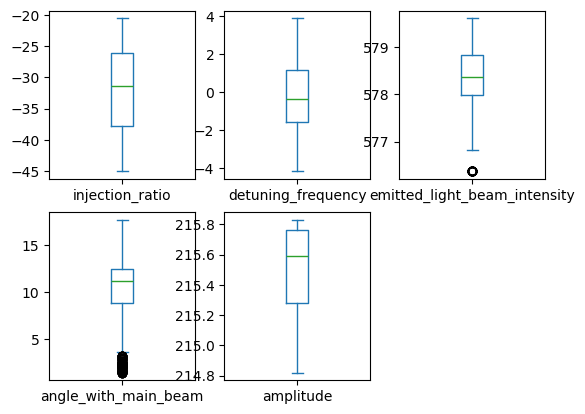

In [9]:
dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

c:\Users\ashen\anaconda3\envs\detection\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\ashen\anaconda3\envs\detection\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ashen\anaconda3\envs\detection\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ashen\anaconda3\envs\detection\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

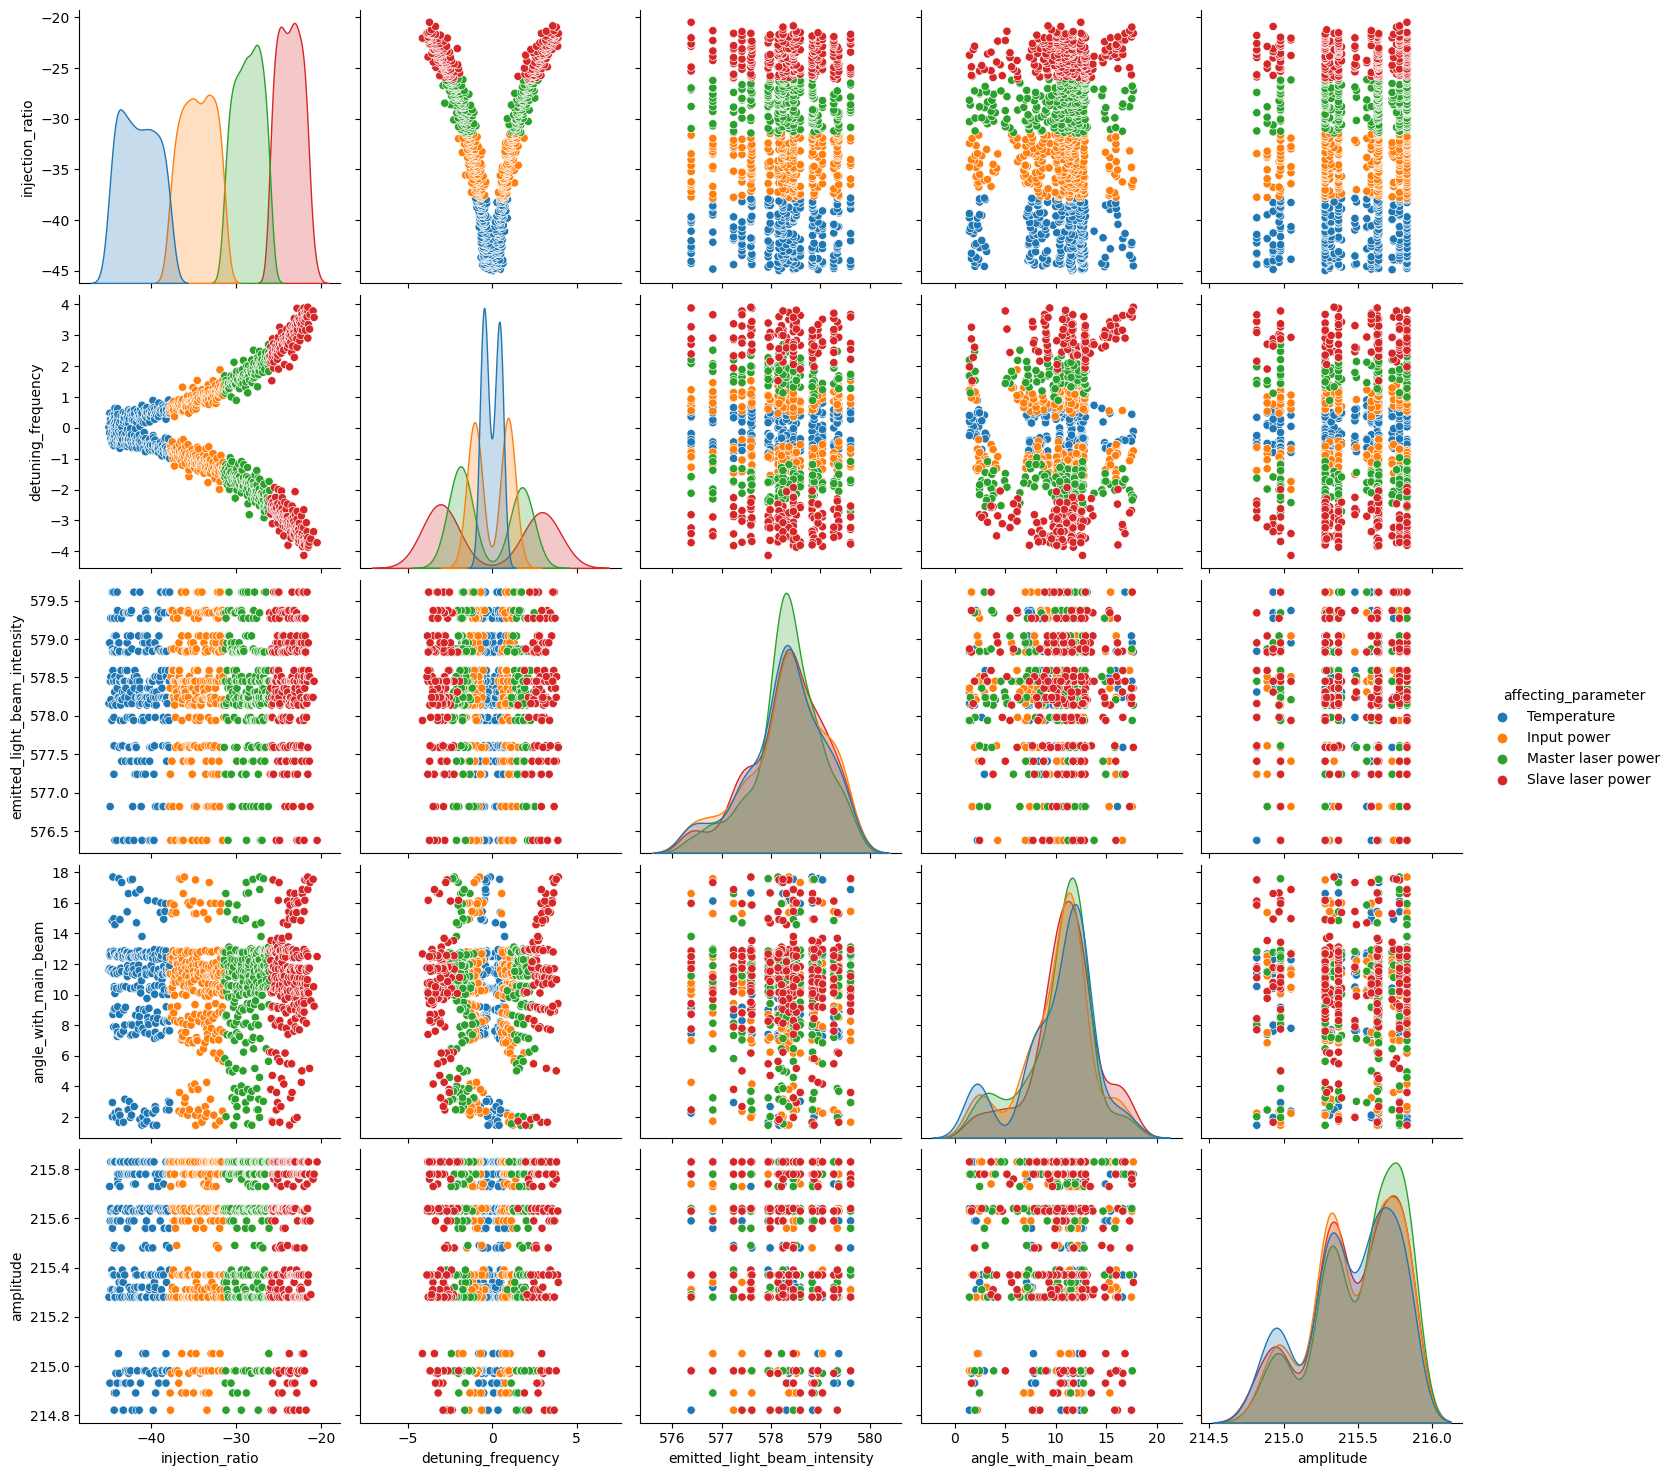

In [10]:
seaborn.pairplot(dataset, hue="affecting_parameter", size=3, diag_kind="kde")
plt.show()

c:\Users\ashen\anaconda3\envs\detection\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\ashen\anaconda3\envs\detection\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ashen\anaconda3\envs\detection\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ashen\anaconda3\envs\detection\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

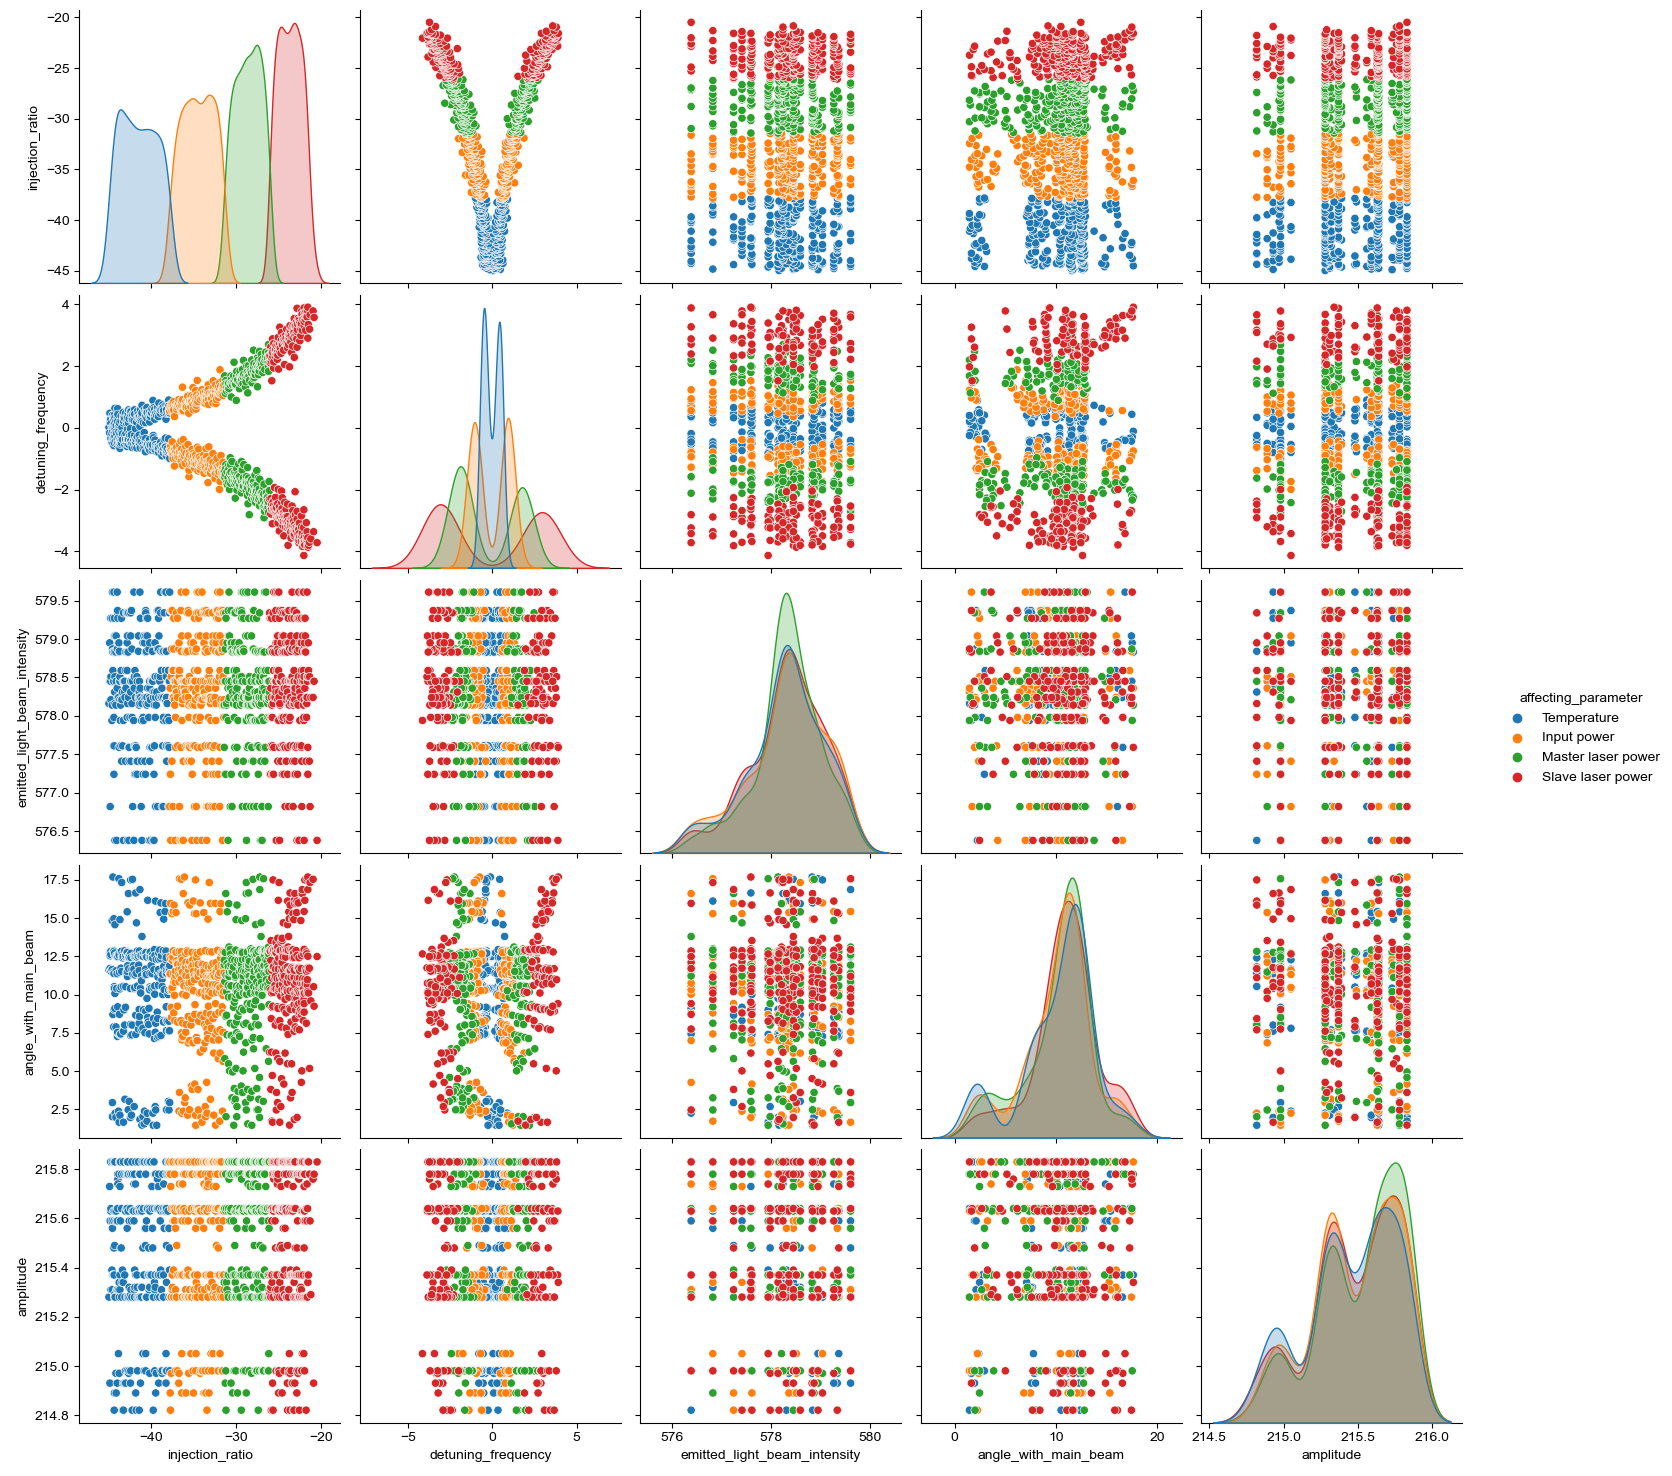

In [11]:
seaborn.pairplot(dataset, hue="affecting_parameter", size = 3)
seaborn.set()

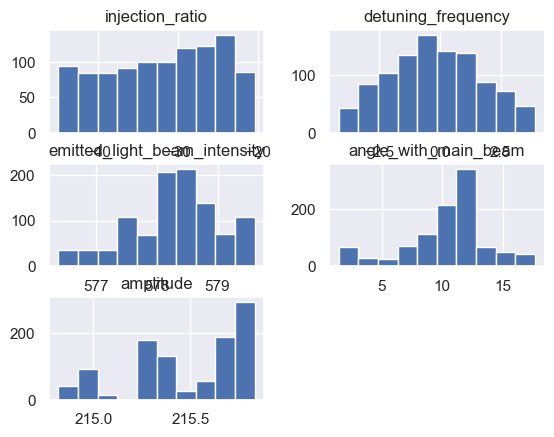

In [12]:
dataset.hist()
plt.show()

In [13]:
array = dataset.values
X = array[:,0:4]
Y = array[:,5]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, 
random_state=seed)

In [14]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [15]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_instances, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

C:\Users\ashen\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashen\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

LR: 0.981640 (0.134249)
LDA: 0.973072 (0.161872)
KNN: 0.965728 (0.181926)
CART: 0.993880 (0.077990)
NB: 0.977968 (0.146787)
SVM: 0.258262 (0.437679)


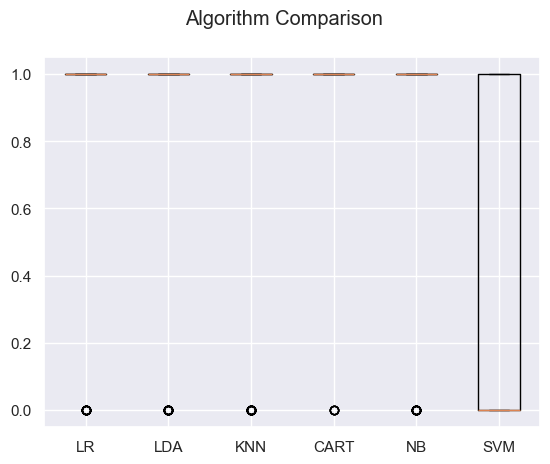

In [16]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [17]:
# Make predictions on validation dataset
svn = SVC()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.2146341463414634
[[44  0  0  0]
 [55  0  0  0]
 [56  0  0  0]
 [50  0  0  0]]
                    precision    recall  f1-score   support

       Input power       0.21      1.00      0.35        44
Master laser power       0.00      0.00      0.00        55
 Slave laser power       0.00      0.00      0.00        56
       Temperature       0.00      0.00      0.00        50

          accuracy                           0.21       205
         macro avg       0.05      0.25      0.09       205
      weighted avg       0.05      0.21      0.08       205



C:\Users\ashen\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashen\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashen\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
#Input Vector 
X_new = numpy.array([[56, 20, 52, 62],
[80.0, 4.5, 54.7, 99.2],
[91, 18, 76, 89],
[53.0, 68.4, 22.0, 39.6]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (4, 4)


In [23]:
prediction = svn.predict(X_new)

In [24]:
#Prediction of the species from the input vector
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Input power' 'Input power' 'Input power' 'Input power']


In [ ]:
import random

# Generate random integers
random_integers_1 = [random.randint(1, 100) for _ in range(4)]
random_integers_2 = [random.randint(1, 100) for _ in range(4)]

# Generate random floats
random_floats_1 = [round(random.uniform(0.1, 100.0), 1) for _ in range(4)]
random_floats_2 = [round(random.uniform(0.1, 100.0), 1) for _ in range(4)]

print(random_integers_1)
print(random_floats_1)
print(random_integers_2)
print(random_floats_2)
